In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv('household_electric.csv')
data = data.drop('Date', axis=1)
data = data.drop('Time', axis=1)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
from sklearn.preprocessing import StandardScaler
X = data.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet[:7]

array([[ 2.74040741, -0.27421784,  2.87615093, -0.18589653, -0.07403413,
         1.35188706],
       [ 2.90473009, -0.35343299,  3.84185274, -0.18589653, -0.07403413,
         1.2299767 ],
       [ 3.47073046, -0.37569179,  3.84185274, -0.18589653,  0.08366905,
         1.35188706],
       [ 3.50724661, -0.34623161,  3.84185274, -0.18589653, -0.07403413,
         1.35188706],
       [ 3.7446016 , -0.2192255 ,  2.33031947, -0.18589653, -0.07403413,
         1.35188706],
       [ 3.68982737, -0.26243376,  2.16237133, -0.18589653,  0.08366905,
         1.35188706],
       [ 3.67156929, -0.25785107,  2.33031947, -0.18589653, -0.07403413,
         1.35188706]])

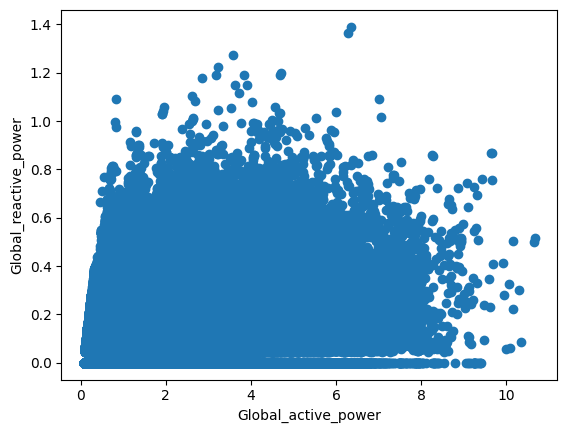

In [6]:
x_ = data['Global_active_power']
y_ = data['Global_reactive_power']
plt.scatter(x_, y_)
plt.xlabel('Global_active_power')
plt.ylabel('Global_reactive_power')

plt.show()

In [7]:
clusterNum = 5
k_means = KMeans(n_clusters = clusterNum, random_state=30, n_init=12)
k_means.fit(Clus_dataSet)

KMeans(n_clusters=5, n_init=12, random_state=30)

In [8]:
labels = k_means.labels_
data["Clus_Consum"] = labels
data.head(10)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Clus_Consum
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2
5,3.520,0.522,235.02,15.0,0.0,2.0,17.0,2
6,3.702,0.520,235.09,15.8,0.0,1.0,17.0,2
7,3.700,0.520,235.22,15.8,0.0,1.0,17.0,2
8,3.668,0.510,233.99,15.8,0.0,1.0,17.0,2
9,3.662,0.510,233.86,15.8,0.0,2.0,16.0,2


In [9]:
data.groupby('Clus_Consum').mean()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Clus_Consum,,,,,,,
0,3.713422,0.189107,236.995969,15.829659,0.754372,34.943141,10.617939
1,0.508838,0.108896,240.782686,2.222871,0.044008,0.388365,0.231059
2,1.871159,0.123760,238.823716,7.842945,0.182817,0.473899,17.394534
3,4.055688,0.200470,236.213293,17.252143,36.730570,2.922936,10.981324
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


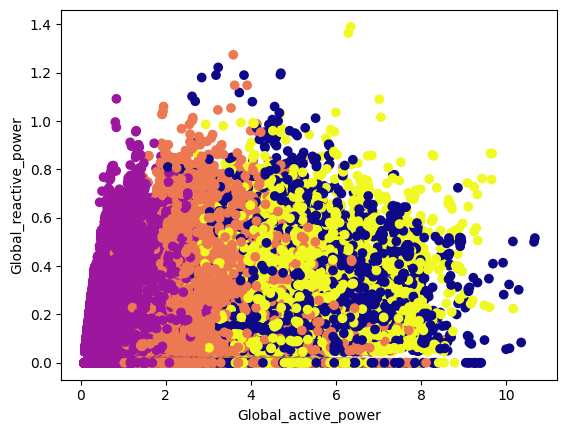

In [10]:
x_ = data['Global_active_power']
y_ = data['Global_reactive_power']
plt.scatter(x_, y_, c = labels, cmap='plasma')
plt.xlabel('Global_active_power')
plt.ylabel('Global_reactive_power')

plt.show()

In [11]:
#Evaluasi SSE
sse = []
for i in range(1, 10):
  kmeans = KMeans(n_clusters = i, random_state=30)
  kmeans.fit(Clus_dataSet)
  sse_ = kmeans.inertia_
  sse.append(sse_)
  print(i, sse_)

1 6291449.9999999665
2 4708841.187416579
3 3637680.341290759
4 2627776.921456048
5 1734514.2842461322
6 1338001.4576380402
7 1124551.8259236342
8 1040860.5355419964
9 946567.1259426023


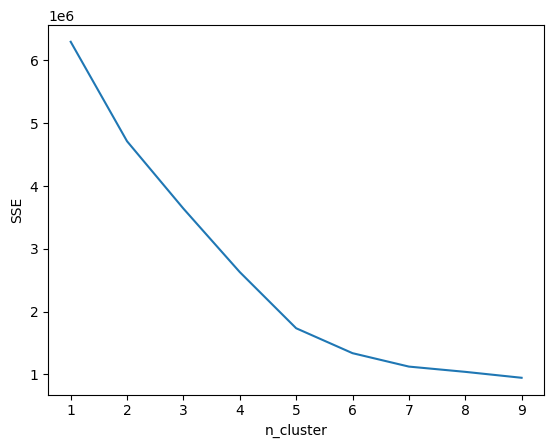

In [12]:
index = range(1, 10)
plt.plot(index, sse)
plt.xlabel('n_cluster')
plt.ylabel('SSE')
plt.show()

In [13]:
from sklearn.metrics import silhouette_score

silhouette = []
for i in range(2, 10):
  kmeans = KMeans(n_clusters = i, random_state=30)
  kmeans.fit(Clus_dataSet)
  score = silhouette_score(Clus_dataSet[:10000], kmeans.labels_[:10000])
  silhouette.append(score)
  print(i, score)

2 0.3767347932694541
3 0.4080517389951554
4 0.40858275269074257
5 0.4649639405153176
6 0.4147351461934259
7 0.3969466843231297
8 0.43433769135492273
9 0.44738797179694156


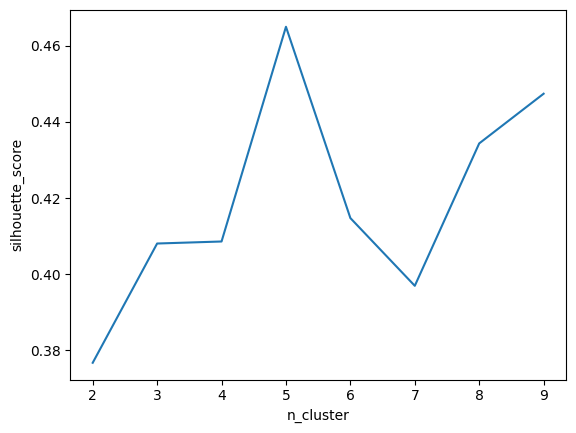

In [14]:
index = range(2, 10)
plt.plot(index, silhouette)
plt.xlabel('n_cluster')
plt.ylabel('silhouette_score')
plt.show()